In [46]:
##### Chapter 5: Classification using Decision Trees and Rules -------------------

#### Part 1: Decision Trees -------------------

## Understanding Decision Trees ----
# calculate entropy of a two-class segment
-0.60 * log2(0.60) - 0.40 * log2(0.40)

[1] 0.9709506

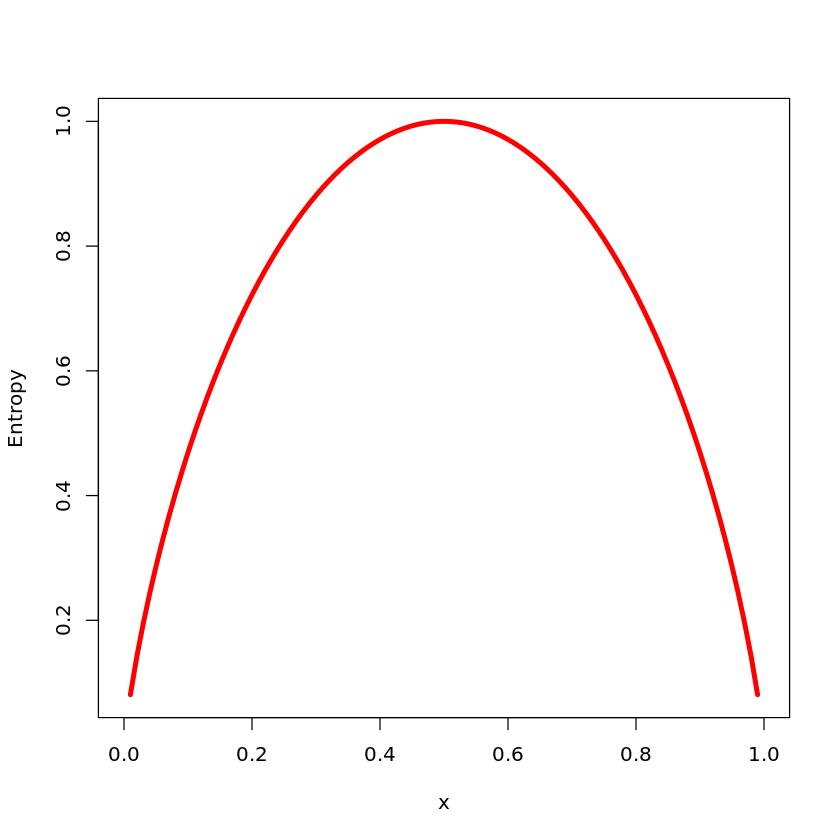

In [1]:
curve(-x * log2(x) - (1 - x) * log2(1 - x),
      col = "red", xlab = "x", ylab = "Entropy", lwd = 4)

In [3]:
## Example: Identifying Risky Bank Loans ----
## Step 2: Exploring and preparing the data ----
credit <- read.csv("./credit.csv")
str(credit)

'data.frame':	1000 obs. of  17 variables:
 $ checking_balance    : Factor w/ 4 levels "< 0 DM","1 - 200 DM",..: 1 2 4 1 1 4 4 2 4 2 ...
 $ months_loan_duration: int  6 48 12 42 24 36 24 36 12 30 ...
 $ credit_history      : Factor w/ 5 levels "critical","good",..: 1 2 1 2 4 2 2 2 2 1 ...
 $ purpose             : Factor w/ 6 levels "business","car",..: 5 5 4 5 2 4 5 2 5 2 ...
 $ amount              : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings_balance     : Factor w/ 5 levels "> 1000 DM","100 - 500 DM",..: 5 3 3 3 3 5 4 3 1 3 ...
 $ employment_duration : Factor w/ 5 levels "1 - 4 years",..: 4 1 3 3 1 1 4 1 3 5 ...
 $ percent_of_income   : int  4 2 2 2 3 2 3 2 2 4 ...
 $ years_at_residence  : int  4 2 3 4 4 4 4 2 4 2 ...
 $ age                 : int  67 22 49 45 53 35 53 35 61 28 ...
 $ other_credit        : Factor w/ 3 levels "bank","none",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ housing             : Factor w/ 3 levels "other","own",..: 2 2 2 1 1 1 2 3 2 2 ...
 $ existi

In [23]:
credit[1:10,]

checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [4]:
# look at two characteristics of the applicant
table(credit$checking_balance)
table(credit$savings_balance)


    < 0 DM 1 - 200 DM   > 200 DM    unknown 
       274        269         63        394 


    > 1000 DM  100 - 500 DM      < 100 DM 500 - 1000 DM       unknown 
           48           103           603            63           183 

In [25]:
# look at two characteristics of the loan
summary(credit$months_loan_duration)
summary(credit$amount)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    4.0    12.0    18.0    20.9    24.0    72.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    250    1366    2320    3271    3972   18420 

In [63]:
# look at the class variable
table(credit$default)


 no yes 
700 300 

In [27]:
# create a random sample for training and test data
# use set.seed to use the same random number sequence as the tutorial
set.seed(123)
train_sample <- sample(1000, 900)

str(train_sample)

 int [1:900] 288 788 409 881 937 46 525 887 548 453 ...


In [28]:
# split the data frames
credit_train <- credit[train_sample, ]
credit_test  <- credit[-train_sample, ]

# check the proportion of class variable
prop.table(table(credit_train$default))
prop.table(table(credit_test$default))


       no       yes 
0.7033333 0.2966667 


  no  yes 
0.67 0.33 

In [29]:
## Step 3: Training a model on the data ----
# build the simplest decision tree
library(C50)
credit_model <- C5.0(credit_train[-17], credit_train$default)

# display simple facts about the tree
credit_model


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default)

Classification Tree
Number of samples: 900 
Number of predictors: 16 

Tree size: 57 

Non-standard options: attempt to group attributes


In [30]:
# display detailed information about the tree
summary(credit_model)


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default)


C5.0 [Release 2.07 GPL Edition]  	Sat May 19 17:38:51 2018
-------------------------------

Class specified by attribute `outcome'

Read 900 cases (17 attributes) from undefined.data

Decision tree:

checking_balance in {> 200 DM,unknown}: no (412/50)
checking_balance in {< 0 DM,1 - 200 DM}:
:...credit_history in {perfect,very good}: yes (59/18)
    credit_history in {critical,good,poor}:
    :...months_loan_duration <= 22:
        :...credit_history = critical: no (72/14)
        :   credit_history = poor:
        :   :...dependents > 1: no (5)
        :   :   dependents <= 1:
        :   :   :...years_at_residence <= 3: yes (4/1)
        :   :       years_at_residence > 3: no (5/1)
        :   credit_history = good:
        :   :...savings_balance in {> 1000 DM,500 - 1000 DM}: no (15/1)
        :       savings_balance = 100 - 500 DM:
        :       :...other_credit = bank: yes (3)
        :       :   other_credit

In [31]:
## Step 4: Evaluating model performance ----
# create a factor vector of predictions on test data
credit_pred <- predict(credit_model, credit_test)

# cross tabulation of predicted versus actual classes
library(gmodels)
CrossTable(credit_test$default, credit_pred,
           prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE,
           dnn = c('actual default', 'predicted default'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
               | predicted default 
actual default |        no |       yes | Row Total | 
---------------|-----------|-----------|-----------|
            no |        59 |         8 |        67 | 
               |     0.590 |     0.080 |           | 
---------------|-----------|-----------|-----------|
           yes |        19 |        14 |        33 | 
               |     0.190 |     0.140 |           | 
---------------|-----------|-----------|-----------|
  Column Total |        78 |        22 |       100 | 
---------------|-----------|-----------|-----------|

 


In [32]:
## Step 5: Improving model performance ----

## Boosting the accuracy of decision trees
# boosted decision tree with 10 trials
credit_boost10 <- C5.0(credit_train[-17], credit_train$default,
                       trials = 10)
credit_boost10


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default, trials = 10)

Classification Tree
Number of samples: 900 
Number of predictors: 16 

Number of boosting iterations: 10 
Average tree size: 47.5 

Non-standard options: attempt to group attributes


In [33]:
summary(credit_boost10)


Call:
C5.0.default(x = credit_train[-17], y = credit_train$default, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Sat May 19 17:38:53 2018
-------------------------------

Class specified by attribute `outcome'

Read 900 cases (17 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

checking_balance in {> 200 DM,unknown}: no (412/50)
checking_balance in {< 0 DM,1 - 200 DM}:
:...credit_history in {perfect,very good}: yes (59/18)
    credit_history in {critical,good,poor}:
    :...months_loan_duration <= 22:
        :...credit_history = critical: no (72/14)
        :   credit_history = poor:
        :   :...dependents > 1: no (5)
        :   :   dependents <= 1:
        :   :   :...years_at_residence <= 3: yes (4/1)
        :   :       years_at_residence > 3: no (5/1)
        :   credit_history = good:
        :   :...savings_balance in {> 1000 DM,500 - 1000 DM}: no (15/1)
        :       savings_balance = 100 - 500 DM:
        :       :...other_credit = bank: yes

In [34]:
credit_boost_pred10 <- predict(credit_boost10, credit_test)
CrossTable(credit_test$default, credit_boost_pred10,
           prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE,
           dnn = c('actual default', 'predicted default'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
               | predicted default 
actual default |        no |       yes | Row Total | 
---------------|-----------|-----------|-----------|
            no |        62 |         5 |        67 | 
               |     0.620 |     0.050 |           | 
---------------|-----------|-----------|-----------|
           yes |        13 |        20 |        33 | 
               |     0.130 |     0.200 |           | 
---------------|-----------|-----------|-----------|
  Column Total |        75 |        25 |       100 | 
---------------|-----------|-----------|-----------|

 


In [35]:
## Making some mistakes more costly than others

# create dimensions for a cost matrix
matrix_dimensions <- list(c("no", "yes"), c("no", "yes"))
names(matrix_dimensions) <- c("predicted", "actual")
matrix_dimensions

# build the matrix
error_cost <- matrix(c(0, 1, 4, 0), nrow = 2, dimnames = matrix_dimensions)
error_cost

$predicted
[1] "no"  "yes"

$actual
[1] "no"  "yes"

,no,yes
no,0,4
yes,1,0


In [36]:
# apply the cost matrix to the tree
credit_cost <- C5.0(credit_train[-17], credit_train$default,
                          costs = error_cost)
credit_cost_pred <- predict(credit_cost, credit_test)

CrossTable(credit_test$default, credit_cost_pred,
           prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE,
           dnn = c('actual default', 'predicted default'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
               | predicted default 
actual default |        no |       yes | Row Total | 
---------------|-----------|-----------|-----------|
            no |        37 |        30 |        67 | 
               |     0.370 |     0.300 |           | 
---------------|-----------|-----------|-----------|
           yes |         7 |        26 |        33 | 
               |     0.070 |     0.260 |           | 
---------------|-----------|-----------|-----------|
  Column Total |        44 |        56 |       100 | 
---------------|-----------|-----------|-----------|

 


In [48]:
#### Part 2: Rule Learners -------------------

## Example: Identifying Poisonous Mushrooms ----
## Step 2: Exploring and preparing the data ---- 
mushrooms <- read.csv("./mushrooms.csv", stringsAsFactors = TRUE)

# examine the structure of the data frame
str(mushrooms)

'data.frame':	8124 obs. of  23 variables:
 $ type                    : Factor w/ 2 levels "edible","poisonous": 2 1 1 2 1 1 1 1 2 1 ...
 $ cap_shape               : Factor w/ 6 levels "bell","conical",..: 3 3 1 3 3 3 1 1 3 1 ...
 $ cap_surface             : Factor w/ 4 levels "fibrous","grooves",..: 4 4 4 3 4 3 4 3 3 4 ...
 $ cap_color               : Factor w/ 10 levels "brown","buff",..: 1 10 9 9 4 10 9 9 9 10 ...
 $ bruises                 : Factor w/ 2 levels "no","yes": 2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "almond","anise",..: 8 1 2 8 7 1 1 2 8 1 ...
 $ gill_attachment         : Factor w/ 2 levels "attached","free": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill_spacing            : Factor w/ 2 levels "close","crowded": 1 1 1 1 2 1 1 1 1 1 ...
 $ gill_size               : Factor w/ 2 levels "broad","narrow": 2 1 1 2 1 1 1 1 2 1 ...
 $ gill_color              : Factor w/ 12 levels "black","brown",..: 1 1 2 2 1 2 5 2 8 5 ...
 $ stalk_shape             : Factor w/

In [49]:
mushrooms[1:10,]

type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,⋯,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,⋯,smooth,white,white,partial,white,one,pendant,black,scattered,urban
edible,convex,smooth,yellow,yes,almond,free,close,broad,black,⋯,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
edible,bell,smooth,white,yes,anise,free,close,broad,brown,⋯,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,⋯,smooth,white,white,partial,white,one,pendant,black,scattered,urban
edible,convex,smooth,gray,no,none,free,crowded,broad,black,⋯,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
edible,convex,scaly,yellow,yes,almond,free,close,broad,brown,⋯,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
edible,bell,smooth,white,yes,almond,free,close,broad,gray,⋯,smooth,white,white,partial,white,one,pendant,black,numerous,meadows
edible,bell,scaly,white,yes,anise,free,close,broad,brown,⋯,smooth,white,white,partial,white,one,pendant,brown,scattered,meadows
poisonous,convex,scaly,white,yes,pungent,free,close,narrow,pink,⋯,smooth,white,white,partial,white,one,pendant,black,several,grasses
edible,bell,smooth,yellow,yes,almond,free,close,broad,gray,⋯,smooth,white,white,partial,white,one,pendant,black,scattered,meadows


In [50]:
mushrooms$veil_type <- NULL # drop the veil_type feature

# examine the class distribution
table(mushrooms$type)


   edible poisonous 
     4208      3916 

In [51]:
## Step 3: Training a model on the data ----
library(RWeka)

# train OneR() on the data
mushroom_1R <- OneR(type ~ ., data = mushrooms)

## Step 4: Evaluating model performance ----
mushroom_1R

odor:
	almond	-> edible
	anise	-> edible
	creosote	-> poisonous
	fishy	-> poisonous
	foul	-> poisonous
	musty	-> poisonous
	none	-> edible
	pungent	-> poisonous
	spicy	-> poisonous
(8004/8124 instances correct)


In [52]:
summary(mushroom_1R)


=== Summary ===

Correctly Classified Instances        8004               98.5229 %
Incorrectly Classified Instances       120                1.4771 %
Kappa statistic                          0.9704
Mean absolute error                      0.0148
Root mean squared error                  0.1215
Relative absolute error                  2.958  %
Root relative squared error             24.323  %
Total Number of Instances             8124     

=== Confusion Matrix ===

    a    b   <-- classified as
 4208    0 |    a = edible
  120 3796 |    b = poisonous

In [53]:
## Step 5: Improving model performance ----
mushroom_JRip <- JRip(type ~ ., data = mushrooms)
mushroom_JRip

JRIP rules:

(odor = foul) => type=poisonous (2160.0/0.0)
(gill_size = narrow) and (gill_color = buff) => type=poisonous (1152.0/0.0)
(gill_size = narrow) and (odor = pungent) => type=poisonous (256.0/0.0)
(odor = creosote) => type=poisonous (192.0/0.0)
(spore_print_color = green) => type=poisonous (72.0/0.0)
(stalk_surface_below_ring = scaly) and (stalk_surface_above_ring = silky) => type=poisonous (68.0/0.0)
(habitat = leaves) and (cap_color = white) => type=poisonous (8.0/0.0)
(stalk_color_above_ring = yellow) => type=poisonous (8.0/0.0)
 => type=edible (4208.0/0.0)

Number of Rules : 9


In [54]:
summary(mushroom_JRip)


=== Summary ===

Correctly Classified Instances        8124              100      %
Incorrectly Classified Instances         0                0      %
Kappa statistic                          1     
Mean absolute error                      0     
Root mean squared error                  0     
Relative absolute error                  0      %
Root relative squared error              0      %
Total Number of Instances             8124     

=== Confusion Matrix ===

    a    b   <-- classified as
 4208    0 |    a = edible
    0 3916 |    b = poisonous

In [55]:
# Rule Learner Using C5.0 Decision Trees (not in text)
library(C50)
mushroom_c5rules <- C5.0(type ~ odor + gill_size, data = mushrooms, rules = TRUE)
summary(mushroom_c5rules)


Call:
C5.0.formula(formula = type ~ odor + gill_size, data = mushrooms, rules = TRUE)


C5.0 [Release 2.07 GPL Edition]  	Sun May 20 23:01:36 2018
-------------------------------

Class specified by attribute `outcome'

Read 8124 cases (3 attributes) from undefined.data

Rules:

Rule 1: (4328/120, lift 1.9)
	odor in {almond, anise, none}
	->  class edible  [0.972]

Rule 2: (3796, lift 2.1)
	odor in {creosote, fishy, foul, musty, pungent, spicy}
	->  class poisonous  [1.000]

Default class: edible


Evaluation on training data (8124 cases):

	        Rules     
	  ----------------
	    No      Errors

	     2  120( 1.5%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	  4208          (a): class edible
	   120  3796    (b): class poisonous


	Attribute usage:

	100.00%	odor


Time: 0.0 secs


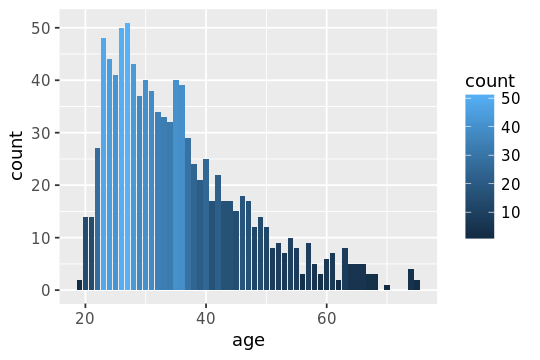

In [119]:
#부록
library(ggplot2)
library(repr)
options(repr.plot.width=4.5, repr.plot.height=3) # plot size 조절.
myplot <- ggplot2::ggplot(credit, aes(x=age, fill = ..count..)) + geom_bar()
myplot

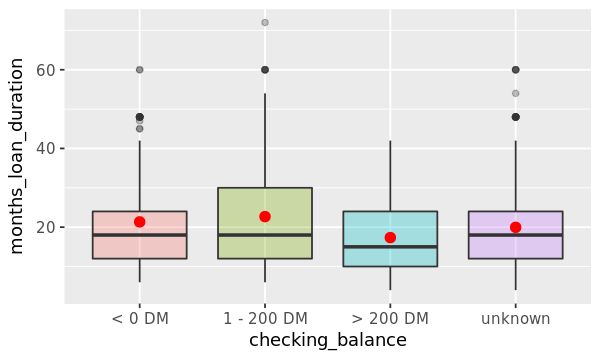

In [128]:
ggplot(credit, aes(x=checking_balance, y=months_loan_duration, fill=checking_balance)) + 
geom_boxplot(alpha=0.3) +
stat_summary(fun.y=mean, geom="point", shape=20, size=4, color="red", fill="red")+
theme(legend.position="none")

In [111]:
library(plyr)
#해당 클래스에 속하는 정보들을 손쉽게 분리해줌.
plyr::ddply(credit, .(checking_balance), summarize, Total = length(checking_balance), Mean_age=mean(age),
            Mean_amount= mean(amount), Mean_loan_duration = mean(months_loan_duration))
#예를 들어 잔고가 > 200 인 클래스의 경우 평균 나이가 다른 클래스에 비해 높고 loan_duration이 낮다는 것을 유추할 수 있다.

checking_balance,Total,Mean_age,Mean_amount,Mean_loan_duration
< 0 DM,274,35.33942,3175.219,21.33942
1 - 200 DM,269,34.08178,3827.561,22.68030
> 200 DM,63,37.19048,2177.651,17.34921
unknown,394,36.42640,3133.102,19.95431


n= 1000 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 1000 300 no (0.7000000 0.3000000)  
    2) checking_balance=> 200 DM,unknown 457  60 no (0.8687090 0.1312910) *
    3) checking_balance=< 0 DM,1 - 200 DM 543 240 no (0.5580110 0.4419890)  
      6) months_loan_duration< 22.5 306 106 no (0.6535948 0.3464052)  
       12) credit_history=critical,good,poor 278  85 no (0.6942446 0.3057554)  
         24) amount< 7491.5 271  79 no (0.7084871 0.2915129)  
           48) months_loan_duration< 11.5 78  12 no (0.8461538 0.1538462) *
           49) months_loan_duration>=11.5 193  67 no (0.6528497 0.3471503)  
             98) amount>=1387.5 120  30 no (0.7500000 0.2500000) *
             99) amount< 1387.5 73  36 yes (0.4931507 0.5068493)  
              198) purpose=business,furniture/appliances 40  15 no (0.6250000 0.3750000) *
              199) purpose=car,education,renovations 33  11 yes (0.3333333 0.6666667) *
         25) amount>=7491.5 7   1 yes (0.14

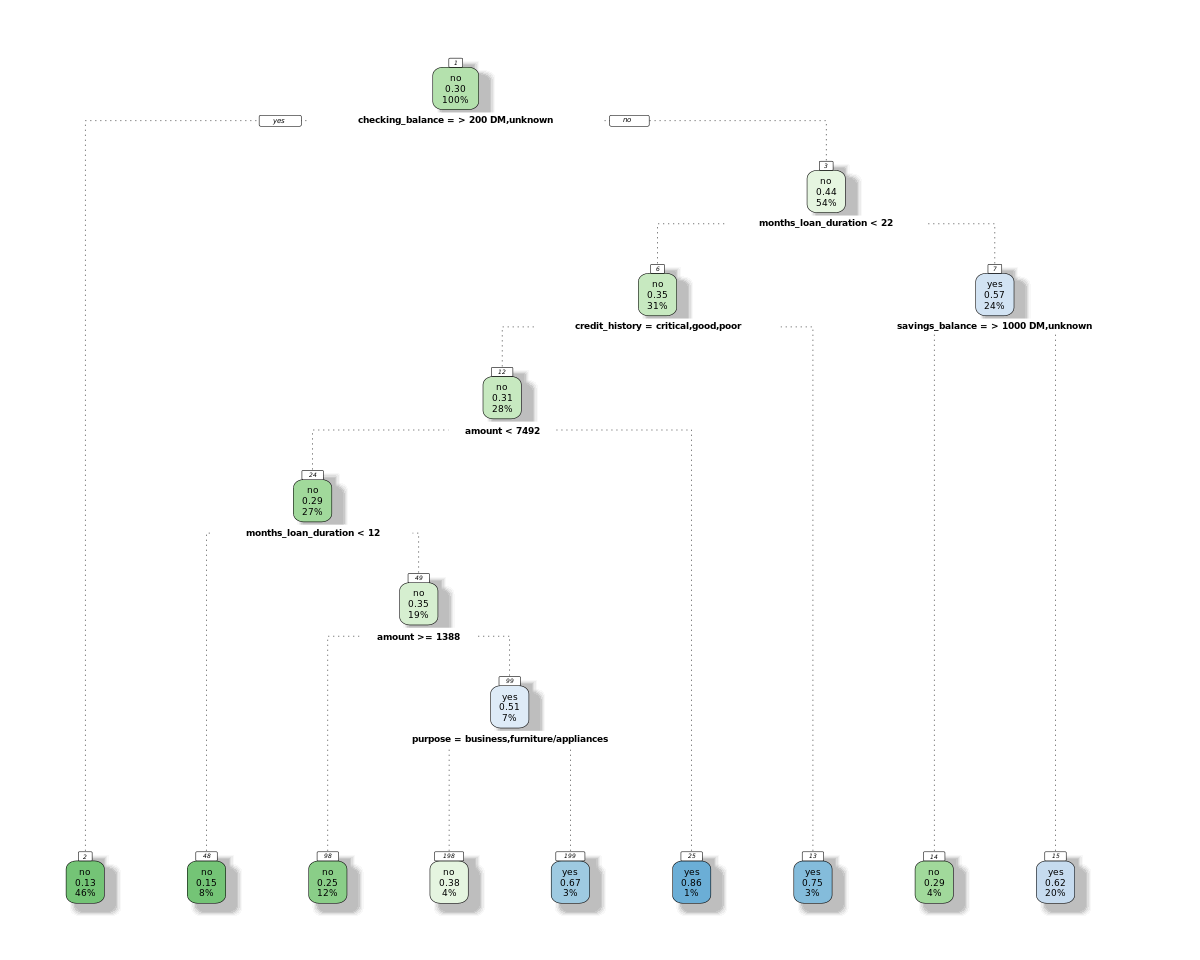

In [133]:
library(rpart)
library(rpart.plot)
options(repr.plot.width=10, repr.plot.height=8) # plot size 조절.

class.tree <- rpart::rpart(default ~ .,                     
                           data = credit ,control = rpart.control(cp = 0.01)) #Complexity parameter
class.tree

rpart.plot::rpart.plot(class.tree,             
                       box.palette="GnBu",            
                       branch.lty=3, shadow.col="gray", nn=TRUE)


n= 8124 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 8124 3916 edible (0.51797144 0.48202856)  
  2) odor=almond,anise,none 4328  120 edible (0.97227357 0.02772643)  
    4) spore_print_color=black,brown,buff,chocolate,orange,purple,white,yellow 4256   48 edible (0.98872180 0.01127820) *
    5) spore_print_color=green 72    0 poisonous (0.00000000 1.00000000) *
  3) odor=creosote,fishy,foul,musty,pungent,spicy 3796    0 poisonous (0.00000000 1.00000000) *

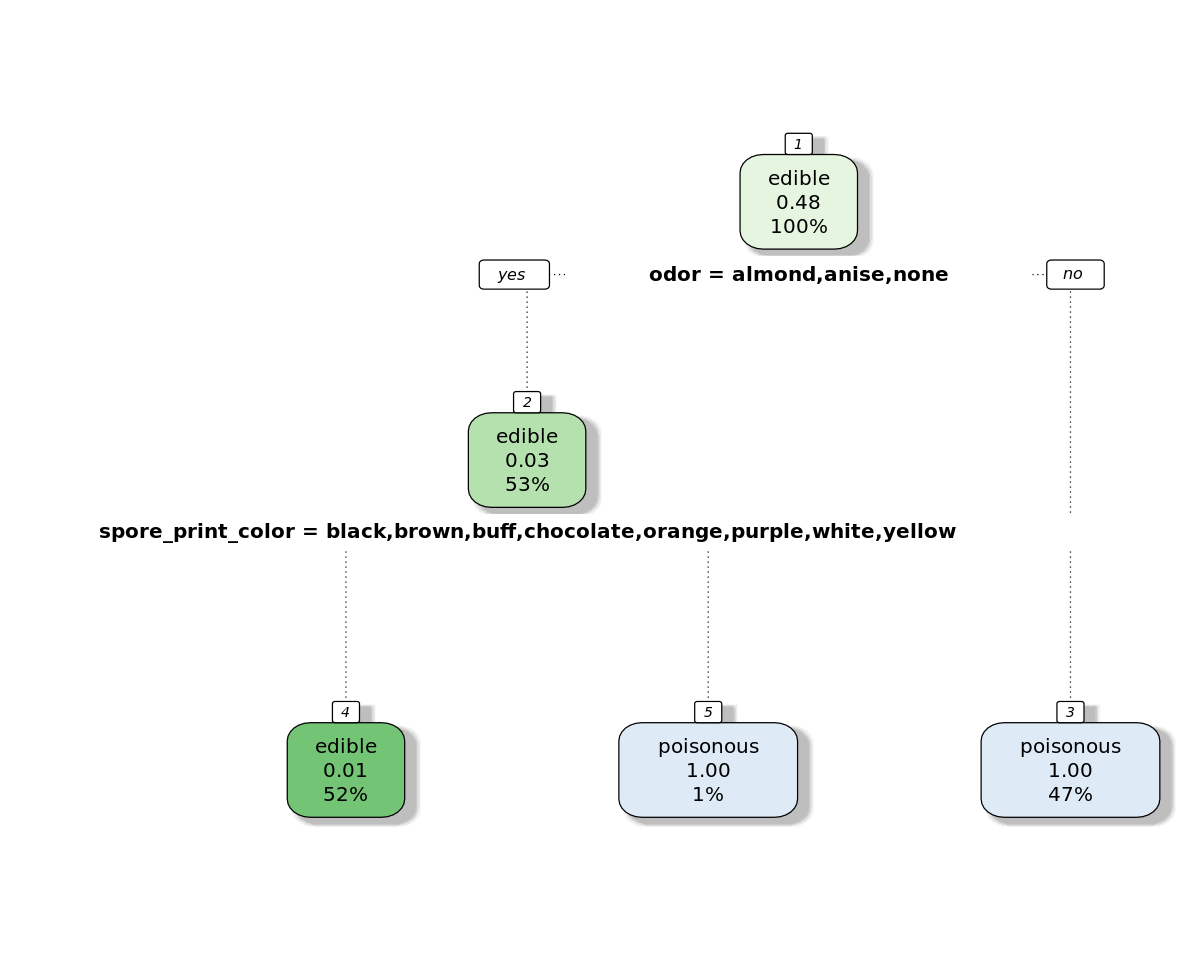

In [135]:
class.tree <- rpart::rpart(type ~ .,                     
                           data = mushrooms ,control = rpart.control(cp = 0.01))
class.tree
rpart.plot::rpart.plot(class.tree,             
                       box.palette="GnBu",            
                       branch.lty=3, shadow.col="gray", nn=TRUE)